In [63]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from typing import Dict, Tuple

import plot_settings
import plot_utils

from importlib import reload

In [64]:
orig_results = pd.read_csv("../political_compass_results.csv")
orig_results = orig_results[orig_results.prompt_name.isin(["Donald Trump", "Hillary Clinton", "Green Party", "Labour Party", "National Party", "New Zealand First Party"])]
orig_results = orig_results[orig_results.model.isin(["meta-llama/Llama-2-7b-hf", "meta-llama/Llama-2-7b-chat-hf"])]
orig_results.head()

,Unnamed: 0,model,prompt_name,average_economic_score,average_social_score,forward_economic_score,forward_social_score,reverse_economic_score,reverse_social_score
123,123,meta-llama/Llama-2-7b-hf,Donald Trump,0.940,0.485,2.38,-0.67,-0.50,1.64
124,124,meta-llama/Llama-2-7b-hf,Hillary Clinton,-0.125,1.050,1.13,-0.31,-1.38,2.41
127,127,meta-llama/Llama-2-7b-hf,Green Party,-0.560,-1.335,1.38,-1.54,-2.50,-1.13
128,128,meta-llama/Llama-2-7b-hf,Labour Party,-1.815,-0.640,-1.25,-2.41,-2.38,1.13
129,129,meta-llama/Llama-2-7b-hf,National Party,-0.065,0.510,-0.38,-0.62,0.25,1.64


In [65]:
ft_results = pd.read_csv("../political_compass_finetuning_results.csv")
ft_results.head()

,Unnamed: 0,model,prompt,average_economic_score,average_social_score,forward_economic_score,forward_social_score,reverse_economic_score,reverse_social_score
0,0,meta-llama/Llama-2-7b-hf,Donald Trump,0.375,0.895,-0.25,-2.67,1.00,4.46
1,1,meta-llama/Llama-2-7b-hf,Hillary Clinton,0.250,0.055,-0.25,-3.38,0.75,3.49
2,2,meta-llama/Llama-2-7b-hf,Green Party,-0.625,-0.410,-2.25,-4.46,1.00,3.64
3,3,meta-llama/Llama-2-7b-hf,Labour Party,0.250,-0.235,-0.50,-3.44,1.00,2.97
4,4,meta-llama/Llama-2-7b-hf,National Party,0.630,0.180,0.13,-3.49,1.13,3.85


In [66]:
gt_res = pd.read_csv("../political_compass_gold_standard_labels.csv")
gt_res = gt_res.rename(columns={"economic_score": "average_economic_score", "social_score": "average_social_score"})
gt_res.head()

,persona,average_economic_score,average_social_score
0,Hillary Clinton,7.5,5.0
1,Donald Trump,6.5,9.0
2,Gary Johnson,9.4,-1.5
3,Jill Stein,-2.4,-2.5
4,Green Party,-3.0,-2.9


## Look at US results

In [67]:
reload(plot_settings), reload(plot_utils)

(<module 'plot_settings' from '/Users/adelaidechambers/Desktop/CSE599 J/course_project/Ophiuchus/figures/plot_settings.py'>,
 <module 'plot_utils' from '/Users/adelaidechambers/Desktop/CSE599 J/course_project/Ophiuchus/figures/plot_utils.py'>)

In [68]:
result_rows = {"Donald Trump": [], "Hillary Clinton": []}
for cand in result_rows:
    result_rows[cand].append(gt_res[gt_res.persona == cand])
    for model in ["meta-llama/Llama-2-7b-hf", "meta-llama/Llama-2-7b-chat-hf"]:
        result_rows[cand].append(orig_results[(orig_results.prompt_name == cand) & (orig_results.model == model)])
        result_rows[cand].append(ft_results[(ft_results.prompt == cand) & (ft_results.model == model)])

In [69]:
economic_scores = {cand: [r.average_economic_score.iloc[0] for r in result_rows[cand]] for cand in result_rows}
social_scores = {cand: [r.average_social_score.iloc[0] for r in result_rows[cand]] for cand in result_rows}

In [70]:
economic_scores["Donald Trump"]#["Hillary Clinton"]

[6.5, 0.94, 0.375, 2.005, 0.815]

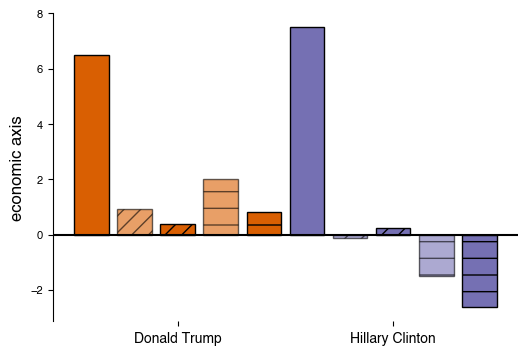

In [71]:
%matplotlib inline

textures = ["//", "//", "-", "-"]

candidate_ordering = plot_settings.get_candidate_ordering(list(economic_scores.keys()))
colors = [plot_settings.get_finetuning_colors(c) for c in candidate_ordering]

ax = plot_settings.get_wider_axis(double=False)
ax.set_ylabel(plot_settings.get_metric_name("economic_score"), fontsize=12)
plot_utils.format_ax(ax)

ax.bar(
    np.arange(0, len(candidate_ordering) * (len(textures) + 1), len(textures) + 1),
    [economic_scores[c][0] for c in candidate_ordering],
    color=colors,
    edgecolor="black"
)

for tidx, texture in enumerate(textures):
    # less intensity for pt
    ax.bar(
        np.arange(tidx + 1, len(candidate_ordering) * (len(textures) + 1), len(textures) + 1),
        [economic_scores[c][tidx+1] for c in candidate_ordering],
        hatch=texture,
        color=colors,
        edgecolor="black",
        alpha=0.6 if tidx % 2 == 0 else 1
    )

ax.set_xticks(
    np.arange(len(textures)//2, len(candidate_ordering) * (len(textures) + 1), len(textures) + 1),
    candidate_ordering, 
    fontsize=10
)
ax.xaxis.tick_bottom()

ax.axhline(y = 0.0, xmin=0, xmax=len(candidate_ordering), color="black")
ax.spines["bottom"].set_visible(False)

ax.set_yscale("linear")

plt.show()

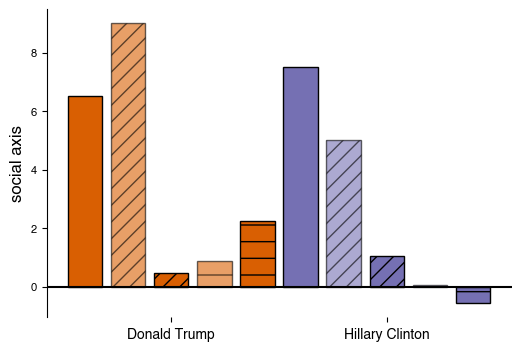

In [72]:
%matplotlib inline

textures = ["//", "//", "-", "-"]

candidate_ordering = plot_settings.get_candidate_ordering(list(social_scores.keys()))
colors = [plot_settings.get_finetuning_colors(c) for c in candidate_ordering]

ax = plot_settings.get_wider_axis(double=False)
ax.set_ylabel(plot_settings.get_metric_name("social_score"), fontsize=12)
plot_utils.format_ax(ax)

ax.bar(
    np.arange(0, len(candidate_ordering) * (len(textures) + 1), len(textures) + 1),
    [economic_scores[c][0] for c in candidate_ordering],
    color=colors,
    edgecolor="black"
)

for tidx, texture in enumerate(textures):
    # less intensity for pt
    ax.bar(
        np.arange(tidx + 1, len(candidate_ordering) * (len(textures) + 1), len(textures) + 1),
        [social_scores[c][tidx] for c in candidate_ordering],
        hatch=texture,
        color=colors,
        edgecolor="black",
        alpha=0.6 if tidx % 2 == 0 else 1
    )

ax.set_xticks(
    np.arange(len(textures)//2, len(candidate_ordering) * (len(textures) + 1), len(textures) + 1),
    candidate_ordering, 
    fontsize=10
)
ax.xaxis.tick_bottom()

ax.axhline(y = 0.0, xmin=0, xmax=len(candidate_ordering), color="black")
ax.spines["bottom"].set_visible(False)

plt.show()

## Now look at NZ

In [55]:
result_rows = {"Green Party": [], "Labour Party": [], "National Party": [], "New Zealand First Party": []}
for cand in result_rows:
    result_rows[cand].append(gt_res[gt_res.persona == cand])
    for model in ["meta-llama/Llama-2-7b-hf", "meta-llama/Llama-2-7b-chat-hf"]:
        result_rows[cand].append(orig_results[(orig_results.prompt_name == cand) & (orig_results.model == model)])
        result_rows[cand].append(ft_results[(ft_results.prompt == cand) & (ft_results.model == model)])

In [59]:
economic_scores = {cand: [r.average_economic_score.iloc[0] for r in result_rows[cand]] for cand in result_rows}
social_scores = {cand: [r.average_social_score.iloc[0] for r in result_rows[cand]] for cand in result_rows}

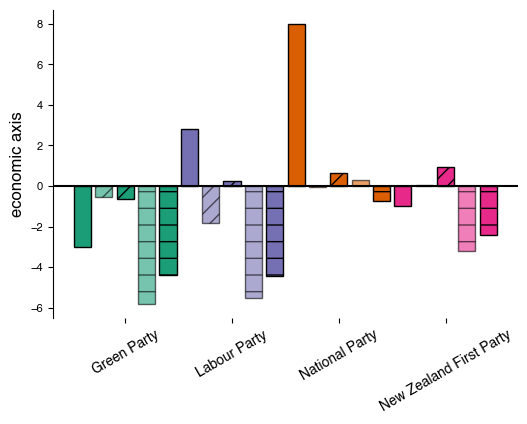

In [62]:
%matplotlib inline

textures = ["//", "//", "-", "-"]

candidate_ordering = plot_settings.get_candidate_ordering(list(economic_scores.keys()))
colors = [plot_settings.get_finetuning_colors(c) for c in candidate_ordering]

ax = plot_settings.get_wider_axis(double=False)
ax.set_ylabel(plot_settings.get_metric_name("economic_score"), fontsize=12)
plot_utils.format_ax(ax)

ax.bar(
    np.arange(0, len(candidate_ordering) * (len(textures) + 1), len(textures) + 1),
    [economic_scores[c][0] for c in candidate_ordering],
    color=colors,
    edgecolor="black"
)

for tidx, texture in enumerate(textures):
    # less intensity for pt
    ax.bar(
        np.arange(tidx + 1, len(candidate_ordering) * (len(textures) + 1), len(textures) + 1),
        [economic_scores[c][tidx+1] for c in candidate_ordering],
        hatch=texture,
        color=colors,
        edgecolor="black",
        alpha=0.6 if tidx % 2 == 0 else 1
    )

ax.set_xticks(
    np.arange(len(textures)//2, len(candidate_ordering) * (len(textures) + 1), len(textures) + 1),
    candidate_ordering, 
    fontsize=10,
    rotation=30
)
ax.xaxis.tick_bottom()

ax.axhline(y = 0.0, xmin=0, xmax=len(candidate_ordering), color="black")
ax.spines["bottom"].set_visible(False)

ax.set_yscale("linear")

plt.show()